<a href="https://colab.research.google.com/github/sunq99/AI-/blob/main/%EA%B0%9C%EB%B0%9C%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Episode 1/3000, Reward: -2
Episode 2/3000, Reward: 6
Episode 3/3000, Reward: -7
Episode 4/3000, Reward: 15
Episode 5/3000, Reward: -5
Episode 6/3000, Reward: -6
Episode 7/3000, Reward: -10
Episode 8/3000, Reward: 5
Episode 9/3000, Reward: 3
Episode 10/3000, Reward: -9
Episode 11/3000, Reward: -8
Episode 12/3000, Reward: -5
Episode 13/3000, Reward: 28
Episode 14/3000, Reward: -6
Episode 15/3000, Reward: -10
Episode 16/3000, Reward: -6
Episode 17/3000, Reward: -10
Episode 18/3000, Reward: -2
Episode 19/3000, Reward: -3
Episode 20/3000, Reward: -8
Episode 21/3000, Reward: -1
Episode 22/3000, Reward: -8
Episode 23/3000, Reward: -1
Episode 24/3000, Reward: 3
Episode 25/3000, Reward: -8
Episode 26/3000, Reward: 2
Episode 27/3000, Reward: 13
Episode 28/3000, Reward: -2
Episode 29/3000, Reward: 14
Episode 30/3000, Reward: -7
Episode 31/3000, Reward: -4
Episode 32/3000, Reward: -8
Episode 33/3000, Reward: -8
Episode 34/3000, Reward: -5
Episode 35/3000, Reward: 11
Episode 36/3000, Reward: -7
Epi

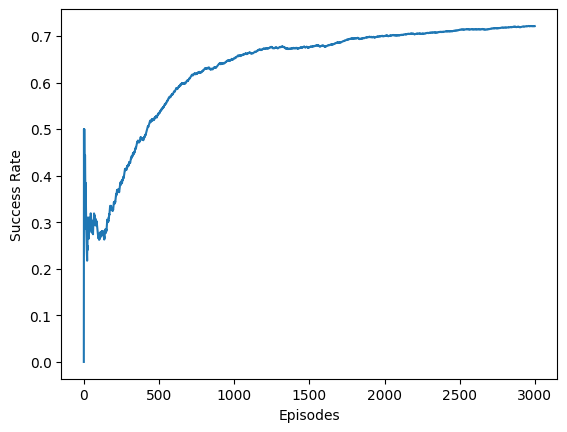

Evaluation Episode 1/300, Reward: -10, 실패
Evaluation Episode 2/300, Reward: 56, 성공
Evaluation Episode 3/300, Reward: 56, 성공
Evaluation Episode 4/300, Reward: 56, 성공
Evaluation Episode 5/300, Reward: 56, 성공
Evaluation Episode 6/300, Reward: 56, 성공
Evaluation Episode 7/300, Reward: 56, 성공
Evaluation Episode 8/300, Reward: 56, 성공
Evaluation Episode 9/300, Reward: 56, 성공
Evaluation Episode 10/300, Reward: 56, 성공
Evaluation Episode 11/300, Reward: 56, 성공
Evaluation Episode 12/300, Reward: 56, 성공
Evaluation Episode 13/300, Reward: 56, 성공
Evaluation Episode 14/300, Reward: 56, 성공
Evaluation Episode 15/300, Reward: 56, 성공
Evaluation Episode 16/300, Reward: 56, 성공
Evaluation Episode 17/300, Reward: 56, 성공
Evaluation Episode 18/300, Reward: 56, 성공
Evaluation Episode 19/300, Reward: 56, 성공
Evaluation Episode 20/300, Reward: 56, 성공
Evaluation Episode 21/300, Reward: 56, 성공
Evaluation Episode 22/300, Reward: 56, 성공
Evaluation Episode 23/300, Reward: 56, 성공
Evaluation Episode 24/300, Reward: -10, 실패

88.66666666666667

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Minesweeper 환경 클래스 정의
class Minesweeper:
    def __init__(self, width=9, height=9, num_mines=10):
        self.width = width
        self.height = height
        self.num_mines = num_mines
        self.board = np.zeros((width, height), dtype=int)  # 보드 초기화
        self.revealed = np.zeros((width, height), dtype=bool)  # 열린 칸 추적
        self.mine_positions = set()
        self.place_mines()

    def place_mines(self):
        while len(self.mine_positions) < self.num_mines:
            x = random.randint(0, self.width - 1)
            y = random.randint(0, self.height - 1)
            if (x, y) not in self.mine_positions:
                self.mine_positions.add((x, y))
                self.board[x, y] = -1  # -1은 지뢰를 의미

    def step(self, x, y):
        if (x, y) in self.mine_positions:  # 지뢰를 밟으면
            reward = -10  # 지뢰를 밟았을 때 패널티
            done = True
        else:
            count = sum(
                (self.board[nx, ny] == -1)
                for nx in range(max(0, x - 1), min(self.width, x + 2))
                for ny in range(max(0, y - 1), min(self.height, y + 2))
                if (nx, ny) != (x, y)
            )
            self.board[x, y] = count  # 지뢰 개수 표시
            self.revealed[x, y] = True
            reward = 1  # 안전한 칸을 열면 보상
            done = np.all(self.revealed | (self.board == -1))  # 모든 칸이 열렸으면 종료
        next_state = tuple(map(tuple, self.board))  # 현재 보드 상태 반환
        return reward, next_state, done

    def is_game_over(self):
        return np.all(self.revealed | (self.board == -1))


# Q-learning 에이전트
class MinesweeperQLearningAgent:
    def __init__(self, width, height, num_mines, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.995):
        self.width = width
        self.height = height
        self.num_mines = num_mines
        self.alpha = alpha  # 학습률
        self.gamma = gamma  # 할인율
        self.epsilon = epsilon  # 탐험 vs. 활용 확률
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay  # epsilon 감소 비율
        self.q_table = {}  # Q 테이블을 딕셔너리로 구현 (상태-행동 값을 저장)

    def get_state(self, game):
        # 현재 게임 보드 상태를 상태 벡터로 변환
        return tuple(map(tuple, game.board))

    def choose_action(self, state):
        if state not in self.q_table:
            self.q_table[state] = np.zeros((self.width, self.height))  # 상태에 대한 Q값 초기화

        if random.uniform(0, 1) < self.epsilon:
            # 탐험: 랜덤하게 행동 선택
            return random.randint(0, self.width - 1), random.randint(0, self.height - 1)
        else:
            # 활용: Q값이 최대인 행동 선택
            q_values = self.q_table[state]
            return np.unravel_index(np.argmax(q_values), q_values.shape)

    def update_q_value(self, state, action, reward, next_state):
        if state not in self.q_table:
            self.q_table[state] = np.zeros((self.width, self.height))
        if next_state not in self.q_table:
            self.q_table[next_state] = np.zeros((self.width, self.height))

        current_q = self.q_table[state][action]
        max_future_q = np.max(self.q_table[next_state])
        new_q = current_q + self.alpha * (reward + self.gamma * max_future_q - current_q)

        self.q_table[state][action] = new_q

    def play_game(self, game):
        state = self.get_state(game)
        done = False
        total_reward = 0
        while not done:
            action = self.choose_action(state)
            x, y = action
            reward, next_state, done = game.step(x, y)  # 게임 진행 후 보상과 다음 상태 반환
            self.update_q_value(state, (x, y), reward, next_state)
            state = next_state
            total_reward += reward
        # epsilon 감소
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return total_reward


# 학습 함수
def train_agent(episodes=3000):
    width, height, num_mines = 9, 9, 10  # 고정된 크기 및 지뢰 개수
    agent = MinesweeperQLearningAgent(width, height, num_mines)
    rewards = []

    for episode in range(episodes):
        game = Minesweeper(width, height, num_mines)
        total_reward = agent.play_game(game)
        rewards.append(total_reward)
        print(f"Episode {episode+1}/{episodes}, Reward: {total_reward}")

    # 성공률 시각화
    success_rate = [1 if reward > 0 else 0 for reward in rewards]
    success_rate_cumsum = np.cumsum(success_rate) / np.arange(1, episodes + 1)
    plt.plot(success_rate_cumsum)
    plt.xlabel("Episodes")
    plt.ylabel("Success Rate")
    plt.show()

    return agent

    # 평가 함수
def evaluate_agent(agent, episodes=10, success_threshold=0.8, max_steps=300):
    width, height, num_mines = 9, 9, 10
    total_safe_cells = width * height - num_mines  # 전체 안전한 칸 수
    target_open_cells = int(total_safe_cells * success_threshold)  # 목표로 하는 열린 안전한 칸 수
    agent.epsilon = 0  # 평가 시에는 탐험을 사용하지 않음
    success_count = 0

    for episode in range(episodes):
        game = Minesweeper(width, height, num_mines)
        opened_cells = 0
        total_reward = 0
        done = False
        state = agent.get_state(game)
        steps = 0  # 최대 단계 수를 추적

        while not done and steps < max_steps:  # 최대 단계 제한 추가
            action = agent.choose_action(state)
            x, y = action
            reward, next_state, done = game.step(x, y)
            state = next_state
            total_reward += reward
            steps += 1

            if reward > 0:  # 안전한 칸을 열 때
                opened_cells += 1

            # 목표로 한 안전한 칸을 열었으면 성공 처리
            if opened_cells >= target_open_cells:
                success_count += 1
                done = True  # 에피소드 종료

        # 최대 단계에 도달한 경우 강제 종료 처리
        if steps >= max_steps:
            print(f"Episode {episode+1}: 최대 단계 수 초과로 강제 종료")

        print(f"Evaluation Episode {episode+1}/{episodes}, Reward: {total_reward}, {'성공' if opened_cells >= target_open_cells else '실패'}")

    success_rate = success_count / episodes * 100
    print(f"평가 성공률: {success_rate:.2f}% ({success_count}/{episodes} 에피소드 성공)")
    return success_rate

# 학습 실행
trained_agent = train_agent(episodes=3000)

# 평가 실행
evaluate_agent(trained_agent, episodes=300)


Game Start


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


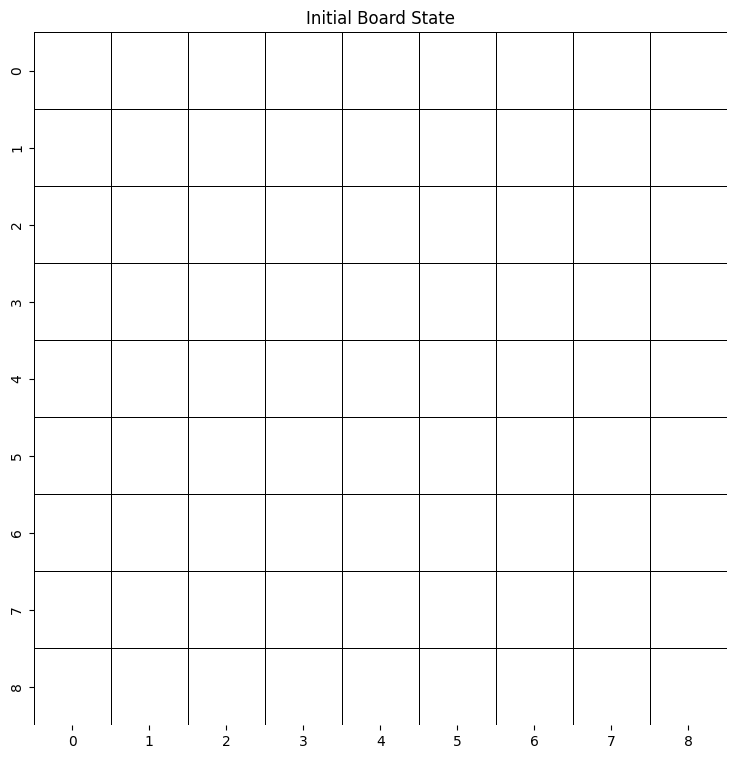

Opened (8, 1), Reward: 1, Total Score: 1


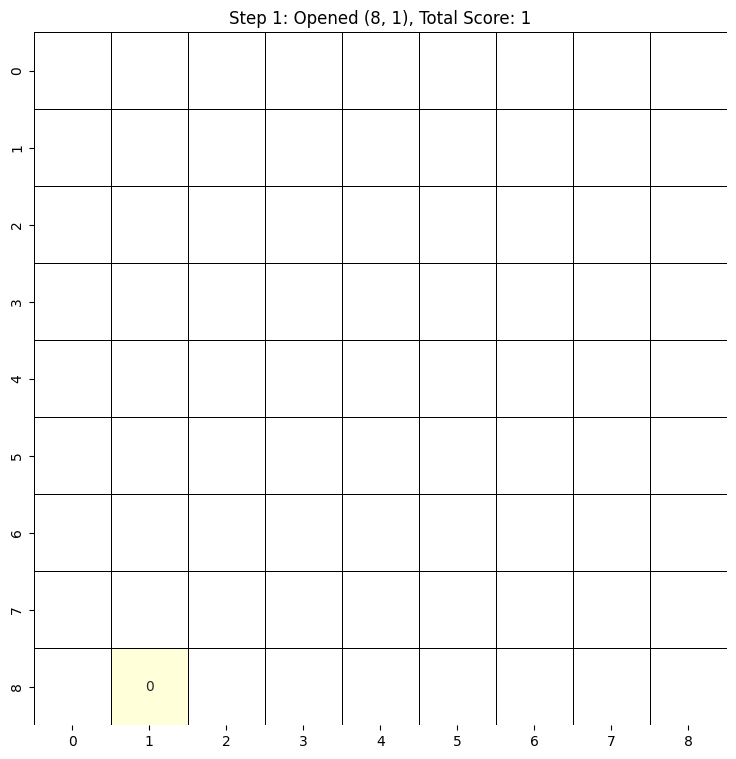

Opened (0, 0), Reward: 1, Total Score: 2


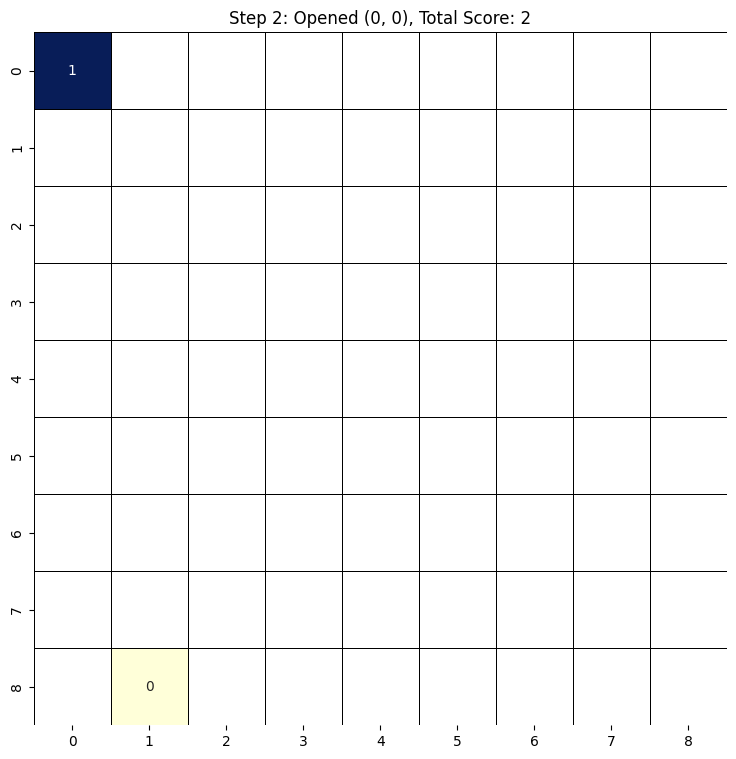

Opened (0, 0), Reward: 1, Total Score: 3


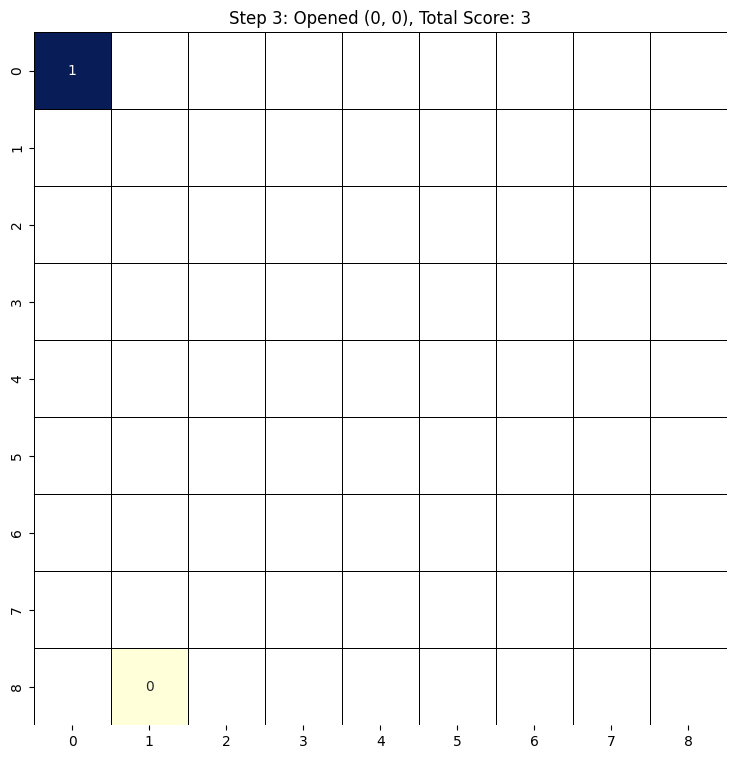

Opened (0, 0), Reward: 1, Total Score: 4


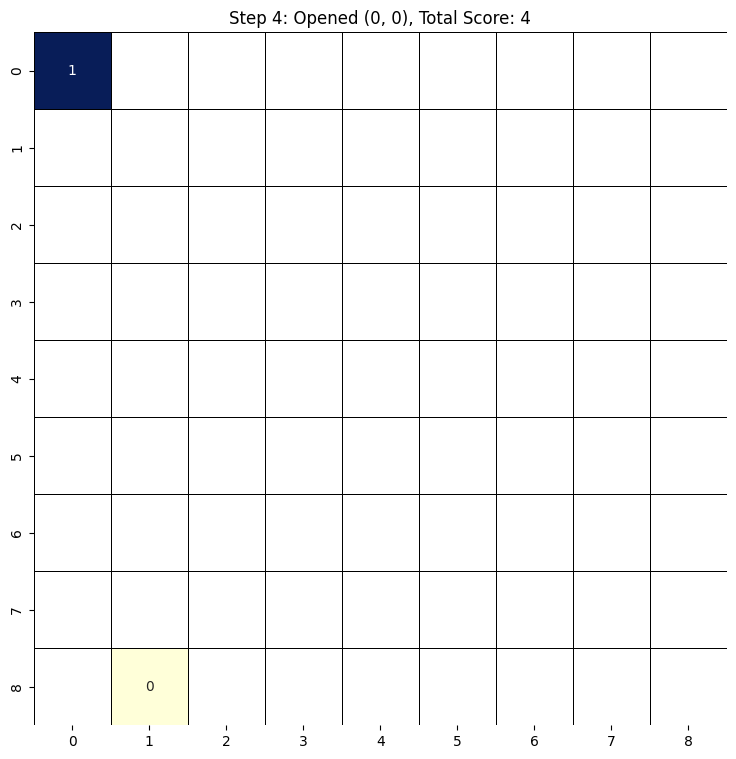

Opened (0, 0), Reward: 1, Total Score: 5


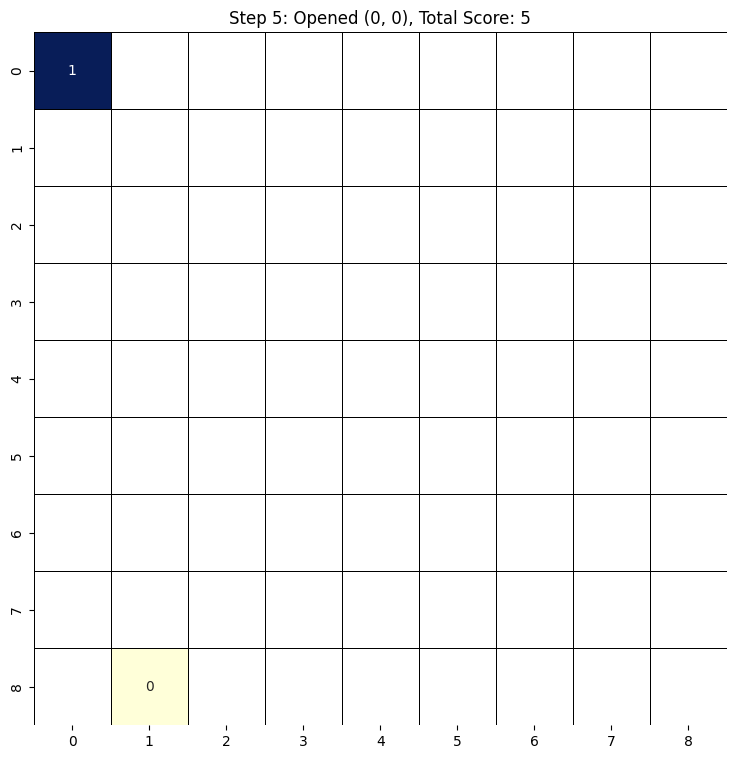

Mine hit at (0, 5) - Game Over. Final Score: -5


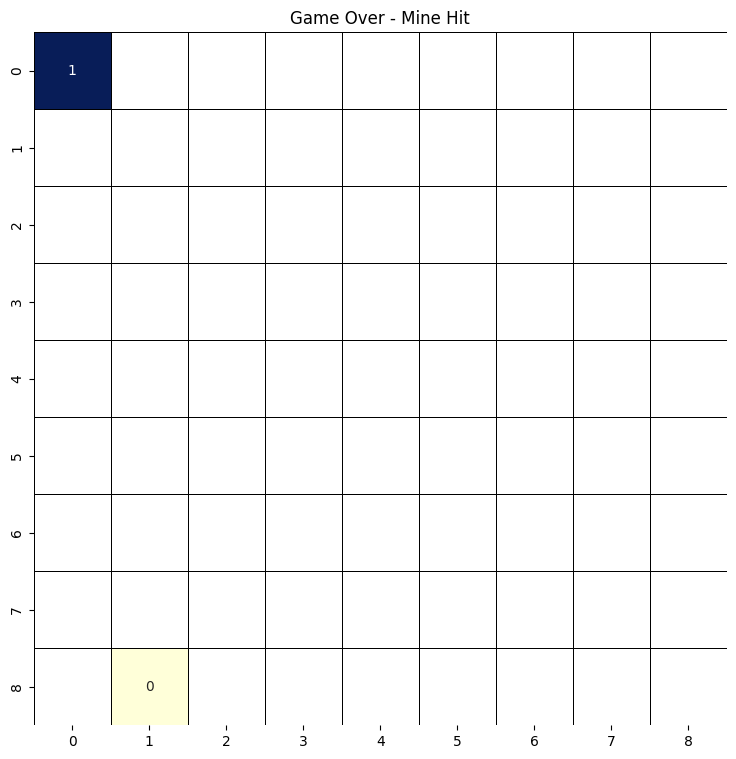

In [ ]:
def display_board(game, title="Current Board State"):
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        game.board,
        annot=True,
        fmt=".0f",
        cmap="YlGnBu",
        cbar=False,
        linewidths=0.5,
        linecolor="black",
        square=True,
        mask=~game.revealed
    )
    plt.title(title)
    plt.show()
    time.sleep(1)

def show_game_play(agent):
    width, height, num_mines = 9, 9, 10
    game = Minesweeper(width, height, num_mines)
    state = agent.get_state(game)
    done = False
    steps = 0
    total_score = 0  # 총 보상 초기화

    # 시연 중 무작위 탐험을 조금 허용하도록 epsilon 설정
    original_epsilon = agent.epsilon
    agent.epsilon = 0.3

    print("Game Start")
    display_board(game, "Initial Board State")  # 초기 보드 상태 출력

    while not done:
        action = agent.choose_action(state)  # AI가 다음 행동을 선택
        x, y = action
        reward, next_state, done = game.step(x, y)  # 선택한 칸을 열고 상태 갱신
        total_score += reward  # 누적 점수 업데이트
        state = next_state
        steps += 1

        # 선택한 칸을 시각적으로 표시
        if (x, y) in game.mine_positions:
            print(f"Mine hit at ({x}, {y}) - Game Over. Final Score: {total_score}")
            display_board(game, title="Game Over - Mine Hit")
            break
        else:
            print(f"Opened ({x}, {y}), Reward: {reward}, Total Score: {total_score}")
            display_board(game, title=f"Step {steps}: Opened ({x}, {y}), Total Score: {total_score}")

    if not (x, y) in game.mine_positions:
        print("Game Successfully Completed! Final Score: {total_score}")
        display_board(game, title="Game Successfully Completed")

    # 시연 후 원래 epsilon 값 복원
    agent.epsilon = original_epsilon


# 게임 시연 실행
show_game_play(trained_agent)
